In [1]:
# import modules
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 7.0)

In [2]:
# check filenames of the data we are exploring:
glob.glob('./data/*.csv')

['./data/RevenueByTax.csv']

In [3]:
def read (fp):
    df = (pd.read_csv(fp)
          .rename(columns=str.lower)
          .pipe(establishments, y='All Establishments')
#          .pipe(tracedata)
          .set_index('company-type')
         )
    return df

In [4]:
def establishments (df,y):
    df = df.copy()
    df = df[df['tax-status'].str.contains(y, na=False)]
    df.drop(df.columns[[1, 2, 3]], axis=1, inplace=True)
    return df

In [5]:
df = read('./data/RevenueByTax.csv')

In [6]:
df.index

Index(['Utilities1 ',
       'Electric Power Generation, Transmission, and Distribution ',
       '0tural Gas Distribution ', 'Water, Sewage and Other Systems ',
       'Transportation and Warehousing2 ', 'Air Transportation ',
       'Scheduled Passenger Air Transportation ',
       'Scheduled Freight Air Transportation ',
       'Nonscheduled Chartered Passenger Air Transportation ',
       'Nonscheduled Chartered Freight Air Transportation ',
       ...
       'Industrial Launderers ', 'Pet Care (except Veteri0ry) Services ',
       'Photofinishing ', 'Parking Lots and Garages ',
       'All Other Perso0l Services ',
       'Religious, Grantmaking, Civic, Professio0l, and Similar Organizations22 ',
       'Grantmaking and Giving Services ', 'Social Advocacy Organizations ',
       'Civic and Social Organizations ',
       'Business, Professio0l, Labor, Political, and Similar Organizations23 '],
      dtype='object', name='company-type', length=352)

In [7]:
'Air Transportation ' in df.index

True

In [8]:
def tracedata (x,y):
    x = x.copy()
    series = x.loc[y:y].iloc[:,0:].squeeze()
    return list(reversed(series))

In [9]:
trace1 = tracedata(df, 'Air Transportation ')
trace2 = tracedata(df, 'Television Broadcasting ')

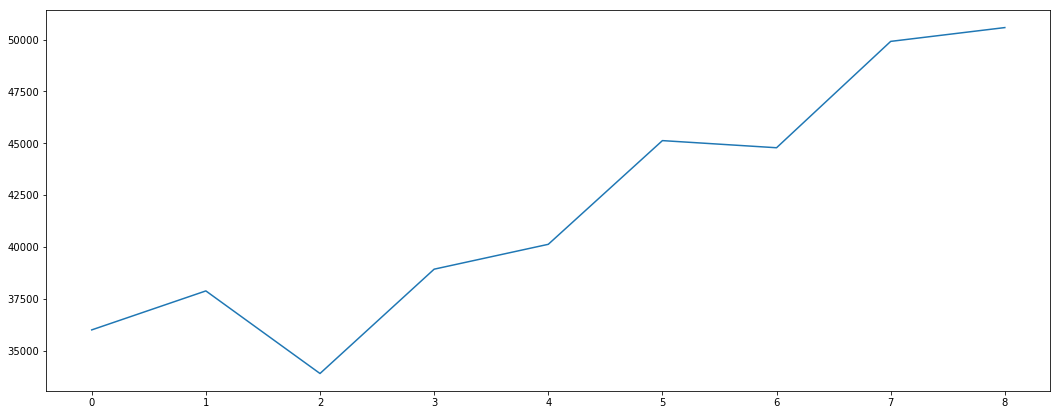

In [10]:
plt.plot(trace2)

#df['company-type'].str.contains("Credit Card Issuing", na=False)
#df['Air Transportation']
cccos = df[df['company-type'].str.contains("Credit Card Issuing", na=False)]
creditcard = cccos.iloc[:,1:14].squeeze()

'''
companies = df[df['TAX-STATUS'].str.contains("All Establishments", na=False)]
companies.drop(companies.columns[[1, 2, 3]], axis=1, inplace=True)
companies.set_index('COMPANY-TYPE')
'''